In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D as ax
import arrayfire as af

from dg_maxwell import params
from dg_maxwell import utils
from dg_maxwell import lagrange
from dg_maxwell import wave_equation_2d as w2d
from dg_maxwell import msh_parser
from dg_maxwell import isoparam
from dg_maxwell import wave_equation as w1d

af.set_backend(params.backend)

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [31]:
N_LGL = 8
xi_LGL  = af.np_to_af_array(np.array(lagrange.LGL_points(N_LGL)))
eta_LGL = af.np_to_af_array(np.array(lagrange.LGL_points(N_LGL)))

Xi, Eta = utils.af_meshgrid(xi_LGL, eta_LGL)

eta = af.tile(eta_LGL, N_LGL)
xi = af.flat(af.transpose(af.tile(xi_LGL, 1, N_LGL)))

_, L_p = lagrange.lagrange_polynomials(xi_LGL)
_, L_q = lagrange.lagrange_polynomials(eta_LGL)

L_p = af.np_to_af_array(L_p)
L_q = af.np_to_af_array(L_q)

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [36]:
print(xi_LGL)
print(af.tile(xi_LGL, 1, N_LGL))

arrayfire.Array()
Type: double

[8 1 1 1]
   -1.0000 
   -0.8717 
   -0.5917 
   -0.2093 
    0.2093 
    0.5917 
    0.8717 
    1.0000 


arrayfire.Array()
Type: double

[8 8 1 1]
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 




In [30]:
# print(af.flat(af.transpose(af.tile(xi_LGL, 1, N_LGL))))
# print(af.tile(af.transpose(eta_LGL), d0 = N_LGL))
print(af.transpose(eta_LGL))
print(af.flat(af.transpose(af.tile(eta_LGL, d0 = 1, d1 = N_LGL))))
# print(eta)

arrayfire.Array()
Type: double

[1 8 1 1]
   -1.0000    -0.8717    -0.5917    -0.2093     0.2093     0.5917     0.8717     1.0000 

arrayfire.Array()
Type: double

[64 1 1 1]
   -1.0000 
   -1.0000 
   -1.0000 
   -1.0000 
   -1.0000 
   -1.0000 
   -1.0000 
   -1.0000 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.8717 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.5917 
   -0.2093 
   -0.2093 
   -0.2093 
   -0.2093 
   -0.2093 
   -0.2093 
   -0.2093 
   -0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.2093 
    0.5917 
    0.5917 
    0.5917 
    0.5917 
    0.5917 
    0.5917 
    0.5917 
    0.5917 
    0.8717 
    0.8717 
    0.8717 
    0.8717 
    0.8717 
    0.8717 
    0.8717 
    0.8717 
    1.0000 
    1.0000 
    1.0000 
    1.0000 
    1.0000 
    1.0000 
    1.0000 
    1.0000 




In [3]:
dLp_dxi  = utils.polynomial_derivative(L_p)
dLq_deta = utils.polynomial_derivative(L_q)

gmshTranslator: Initializing...
gmshTranslator: Mesh has 9 nodes.
gmshTranslator: Mesh has 9 elements.
gmshTranslator: Processed 22 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements


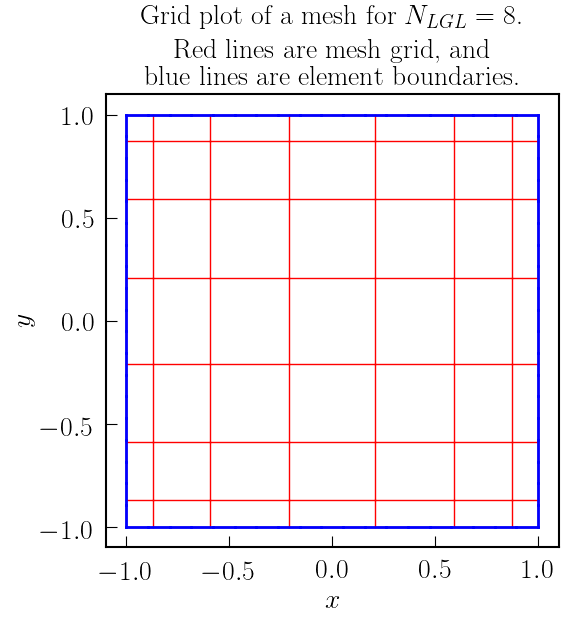

In [4]:
nodes, elements = msh_parser.read_order_2_msh('read_and_plot_mesh/mesh/square_1.msh')

axes_handler = plt.axes()

msh_parser.plot_mesh_grid(nodes, elements, np.array(xi_LGL), np.array(eta_LGL), axes_handler)

plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
          '\n Red lines are mesh grid, and \n'
          'blue lines are element boundaries.')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.savefig('square.png')
plt.show()

In [5]:
dxi_dx  = w2d.dxi_dx(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
dxi_dy  = w2d.dxi_dy(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
deta_dx = w2d.deta_dx(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
deta_dy = w2d.deta_dy(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)

In [6]:
def F_xi(u):
    '''
    '''
    dxi_dx  = w2d.dxi_dx(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
    dxi_dy  = w2d.dxi_dy(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
    
    return w2d.F_x(u) * dxi_dx + w2d.F_y(u) * dxi_dy

def F_eta(u):
    '''
    '''
    deta_dx = w2d.deta_dx(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
    deta_dy = w2d.deta_dy(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)
    
    return w2d.F_x(u) * deta_dx + w2d.F_y(u) * deta_dy

In [7]:
def g_dd(x_nodes, y_nodes, xi, eta):
    '''
    '''
    ans00  =   (w2d.dx_dxi(x_nodes, xi, eta))**2 \
             + (w2d.dy_dxi(y_nodes, xi, eta))**2
    ans11  =   (w2d.dx_deta(x_nodes, xi, eta))**2 \
             + (w2d.dy_deta(y_nodes, xi, eta))**2
    
    ans01  =  (w2d.dx_dxi(x_nodes, xi, eta))  \
            * (w2d.dx_deta(x_nodes, xi, eta)) \
            + (w2d.dy_dxi(y_nodes, xi, eta))  \
            * (w2d.dy_deta(y_nodes, xi, eta))
    
    ans =  [[ans00, ans01],
            [ans01, ans11]
           ]
    
    return ans


def g_uu(x_nodes, y_nodes, xi, eta):
    gCov = g_dd(x_nodes, y_nodes, xi, eta)
    
    
    a = gCov[0][0]
    b = gCov[0][1]
    c = gCov[1][0]
    d = gCov[1][1]
    
    det = (a*d - b*c)
    
    ans = [[d / det, -b / det],
           [-c / det, a / det]]
    
    return ans


def sqrtgDet(x_nodes, y_nodes, xi, eta):
    '''
    '''
    gCov = g_dd(x_nodes, y_nodes, xi, eta)
    
    a = gCov[0][0]
    b = gCov[0][1]
    c = gCov[1][0]
    d = gCov[1][1]
    
    return (a*d - b*c)**0.5


In [8]:
g_ab = g_uu(nodes[elements[0]][:, 0], nodes[elements[0]][:, 1], xi, eta)

In [9]:
x = []
y = []

X = []
Y = []

u_init = []
u_init_mesh = []


for element in elements:
    x.append(af.np_to_af_array(isoparam.isoparam_x_2D(nodes[element][:, 0], np.array(Xi), np.array(Eta))))
    y.append(af.np_to_af_array(isoparam.isoparam_x_2D(nodes[element][:, 1], np.array(Xi), np.array(Eta))))

    X.append(af.np_to_af_array(isoparam.isoparam_x_2D(nodes[element][:, 0], np.array(Xi), np.array(Eta))))
    Y.append(af.np_to_af_array(isoparam.isoparam_x_2D(nodes[element][:, 1], np.array(Xi), np.array(Eta))))

    x[-1] = af.moddims(x[-1], d0 = N_LGL * N_LGL, d1 = 1)
    y[-1] = af.moddims(y[-1], d0 = N_LGL * N_LGL, d1 = 1)

    u_init.append(np.e ** (-(x[-1]**2) / 0.4**2))
    u_init_mesh.append(af.moddims(u_init[-1], d0 = N_LGL, d1 = N_LGL))

/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


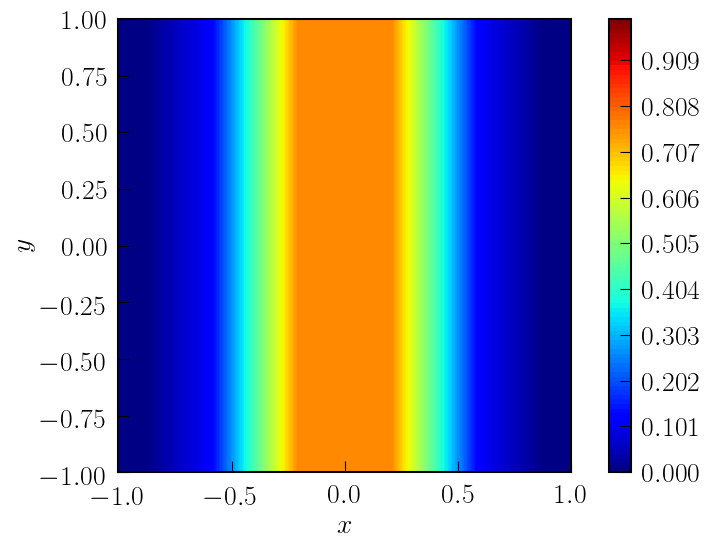

In [10]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
color_levels = np.linspace(0., 1., 100)

for idx in np.arange(len(u_init_mesh)):
#     ax.plot_surface(np.array(X[idx]), np.array(Y[idx]), np.array(u_init_mesh[idx]))
    plt.contourf(np.array(X[idx]), np.array(Y[idx]), np.array(u_init_mesh[idx]),
                 200, levels = color_levels, cmap = 'jet')

plt.axes().set_aspect('equal')
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.colorbar()

# plt.savefig('u_init.png')
plt.show()

In [11]:
L_p_array = af.moddims(af.tile(af.transpose(af.reorder(L_p, d0 = 0, d1 = 2, d2 = 1)),
                               d0 = N_LGL), d0 = N_LGL * N_LGL, d1 = 1, d2 = N_LGL)
L_p_array = af.reorder(L_p_array, d0 = 0, d1 = 2, d2 = 1)

L_q_array = af.tile(L_p, d0 = N_LGL)

dLp_dxi_array = af.moddims(af.tile(af.transpose(af.reorder(dLp_dxi, d0 = 0, d1 = 2, d2 = 1)),
                               d0 = N_LGL), d0 = N_LGL * N_LGL, d1 = 1, d2 = N_LGL - 1)
dLp_dxi_array = af.reorder(dLp_dxi_array, d0 = 0, d1 = 2, d2 = 1)

dLq_deta_array = af.tile(dLq_deta, d0 = N_LGL)

In [12]:
L_p_LGL      = utils.polyval_1d(L_p_array,      xi)
L_q_LGL      = utils.polyval_1d(L_q_array,      eta)
dLp_dxi_LGL  = utils.polyval_1d(dLp_dxi_array , xi)
dLq_deta_LGL = utils.polyval_1d(dLq_deta_array, eta)

In [13]:
F_xi_LGL  = F_xi(u_init[0])
F_eta_LGL = F_eta(u_init[0])

In [14]:
print(af.tile(af.transpose(g_ab[0][0]), d0 = N_LGL * N_LGL).shape)
print(L_p_LGL.shape)
print(dLq_deta_LGL.shape)
print(af.tile(af.transpose(F_xi_LGL), d0 = N_LGL * N_LGL).shape)

(64, 64)
(64, 64)
(64, 64)
(64, 64)


In [ ]:
# Find g_ab at (xi_tile, eta_tile)
# Find F_(xi\eta) at (xi_tile, eta_tile)
# Already have L_p_tile, L_q_tile and their derivatives
# integral = integrate_2d(L_p/q_tile, dL_p/q__dxi_tile, order = 9, scheme = 'gauss')
# integral = integral * g_ab_tile * F_(xi\eta)

# \int g_ab(xi, eta) * F_xi(xi, eta) * (L_p * L_q')
# V_ij = [g_ab(xi, eta) * F_xi(xi, eta) * (L_p * L_q')](xi_i, eta_j)
# \int \Sum Lp*Lq*V_pq

In [15]:
integrals = []
for idx in np.arange(len(u_init)):
    F_xi_LGL  = F_xi(u_init[idx])
    F_eta_LGL = F_eta(u_init[idx])

    integrand_00 = af.tile(af.transpose(g_ab[0][0]), d0 = N_LGL * N_LGL) * L_q_LGL * dLp_dxi_LGL * af.tile(af.transpose(F_xi_LGL), d0 = N_LGL * N_LGL)
    integrand_01 = af.tile(af.transpose(g_ab[0][1]), d0 = N_LGL * N_LGL) * L_p_LGL * dLq_deta_LGL * af.tile(af.transpose(F_eta_LGL), d0 = N_LGL * N_LGL)
    integrand_10 = af.tile(af.transpose(g_ab[1][0]), d0 = N_LGL * N_LGL) * L_q_LGL * dLp_dxi_LGL * af.tile(af.transpose(F_xi_LGL), d0 = N_LGL * N_LGL)
    integrand_11 = af.tile(af.transpose(g_ab[1][1]), d0 = N_LGL * N_LGL) * L_p_LGL * dLq_deta_LGL * af.tile(af.transpose(F_eta_LGL), d0 = N_LGL * N_LGL)

    integrand = integrand_00 + integrand_01 + integrand_10 + integrand_11
    integrand = af.reorder(integrand[0], d0 = 1, d1 = 2, d2 = 0)
    integrals.append(integrand * utils.integrate_2d(L_p_array, L_q_array, order = 9))
    integrals[-1] = af.moddims(integrals[-1], d0 = N_LGL, d1 = N_LGL)
    print(idx)
    

0


In [16]:
max_integral = []
min_integral = []
for integral in integrals:
    max_integral.append(af.max(integral))
    min_integral.append(af.min(integral))

print(min(min_integral))
print(max(max_integral))
color_levels = np.linspace(min(min_integral), max(max_integral), 100)

-37.855908185527994
-0.0007204781265373886


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


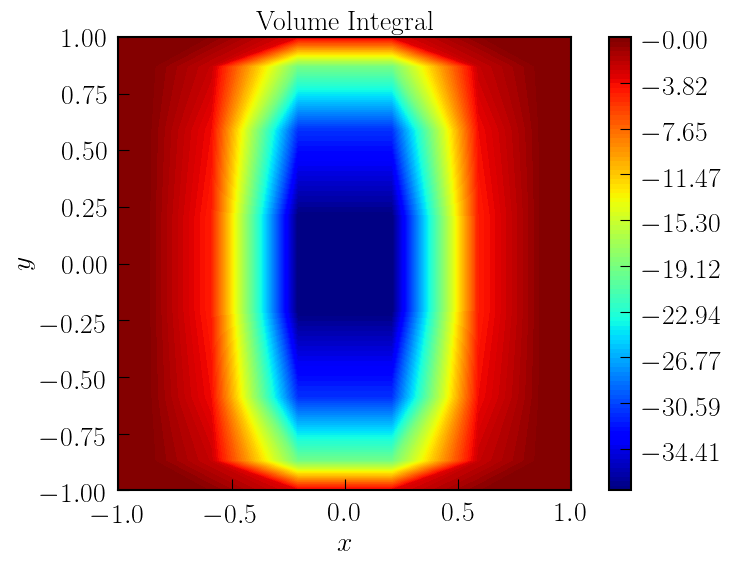

In [17]:
for idx in np.arange(len(integrals)):
    plt.contourf(np.array(X[idx]), np.array(Y[idx]), np.array(integrals[idx]), 200, levels = color_levels, cmap = 'jet')

plt.title(r'Volume Integral')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar()
plt.axes().set_aspect('equal')

plt.savefig('volume_integral.png')
plt.show()

In [69]:
print(integrals[1][1, :])
print(integrals[1][7, :])

arrayfire.Array()
Type: double

[1 8 1 1]
  -15.3931  -107.2906  -230.8866  -345.3406  -345.3406  -230.8866  -107.2906   -15.3931 

arrayfire.Array()
Type: double

[1 8 1 1]
   -2.6091   -18.1857   -39.1352   -58.5351   -58.5351   -39.1352   -18.1857    -2.6091 



In [42]:
print(np.array(Y[idx]))
# print(np.array(integrals[idx][3, :])[0])

[[-1.         -1.         -1.         -1.         -1.         -1.         -1.
  -1.        ]
 [-0.87174015 -0.87174015 -0.87174015 -0.87174015 -0.87174015 -0.87174015
  -0.87174015 -0.87174015]
 [-0.59170018 -0.59170018 -0.59170018 -0.59170018 -0.59170018 -0.59170018
  -0.59170018 -0.59170018]
 [-0.20929922 -0.20929922 -0.20929922 -0.20929922 -0.20929922 -0.20929922
  -0.20929922 -0.20929922]
 [ 0.20929922  0.20929922  0.20929922  0.20929922  0.20929922  0.20929922
   0.20929922  0.20929922]
 [ 0.59170018  0.59170018  0.59170018  0.59170018  0.59170018  0.59170018
   0.59170018  0.59170018]
 [ 0.87174015  0.87174015  0.87174015  0.87174015  0.87174015  0.87174015
   0.87174015  0.87174015]
 [ 1.          1.          1.          1.          1.          1.          1.
   1.        ]]


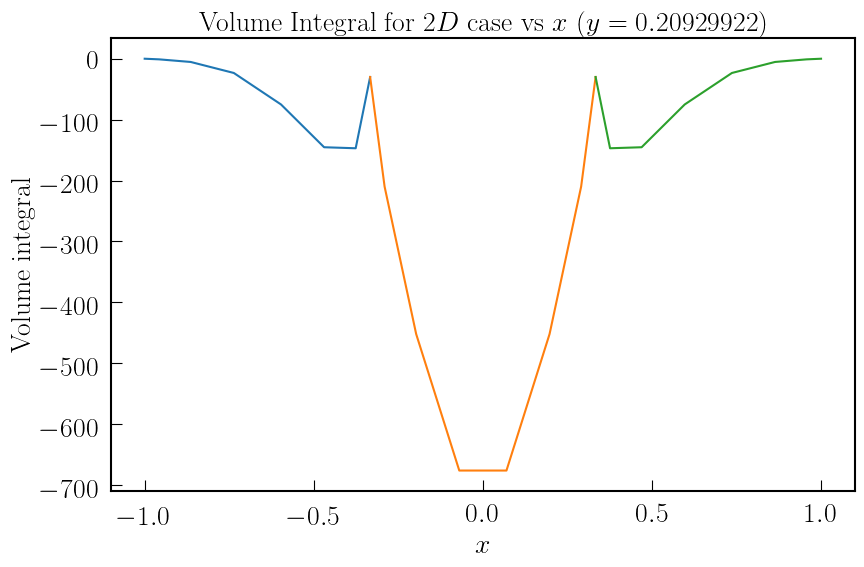

In [44]:
for idx in np.arange(len(integrals)):
    plt.plot(np.array(X[idx][3, :])[0], np.array(integrals[idx][3, :])[0])
    
plt.title(r'Volume Integral for $2D$ case vs $x$ $(y = 0.20929922)$')
plt.xlabel(r'$x$')
plt.ylabel(r'Volume integral')
# plt.axes().set_aspect('equal')

plt.show()

arrayfire.Array()
Type: double

[8 3 1 1]
   -0.0022    -0.5242    -0.4746 
   -0.0027    -0.1503     0.1365 
   -0.0116    -0.2201     0.1682 
   -0.0426    -0.1160     0.1107 
   -0.1107     0.1160     0.0426 
   -0.1682     0.2201     0.0116 
   -0.1365     0.1503     0.0027 
    0.4746     0.5242     0.0022 




/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


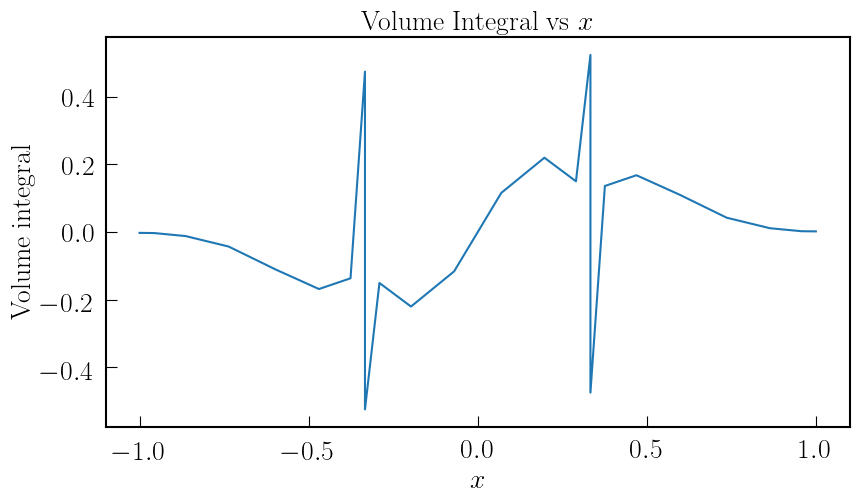

In [22]:
print(w1d.volume_integral_flux(params.u_init))
volume_integral_ref = af.flat(w1d.volume_integral_flux(params.u_init))
x_ref               = af.flat(params.element_LGL)


plt.title(r'Volume Integral for $1D$ vs $x$')
plt.xlabel(r'$x$')
plt.ylabel(r'Volume integral')
plt.axes().set_aspect('equal')

plt.plot(np.array(x_ref), np.array(volume_integral_ref))
plt.show()

In [26]:
foo = np.arange(4)
bar = np.arange(4)

foo, bar = np.meshgrid(foo, bar)
foo = af.np_to_af_array(foo)
bar = af.np_to_af_array(bar)

foo = af.moddims(foo, d0 = 4 * 4, d1 = 1)
bar = af.moddims(bar, d0 = 4 * 4, d1 = 1)

# print(foo)
# print(bar)

print(af.moddims(foo, d0 = 4, d1 = 4))
print(af.moddims(bar, d0 = 4, d1 = 4))


arrayfire.Array()
Type: long int

[4 4 1 1]
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 
         0          1          2          3 


arrayfire.Array()
Type: long int

[4 4 1 1]
         0          0          0          0 
         1          1          1          1 
         2          2          2          2 
         3          3          3          3 


